In [1]:
# Importing the necessary or required libraries used in the Sentiment Analysis In Social Media (Twitter) project.
import re
import string
from collections import Counter
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score,recall_score,f1_score
import numpy as np;

from keras.models import Sequential, load_model
from keras.layers import Dense, LSTM, Embedding, Dropout
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [2]:
# Reading the dataset file Twitter_Data or loading the dataset used in our project.
data = pd.read_csv("Twitter_Data.csv")
print(data.shape)
data.head(100)

(162980, 2)


,text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0
...,...,...
95,country prospers when the women the country ar...,0.0
96,sabbash mera vote for peppermit abvp,0.0
97,yogi adityanath hold 100 rallies seek votes fo...,0.0
98,from the very beginningmodi doing wada faramos...,-1.0


In [3]:
# Reading the columns of dataset text and category.
data.columns = ['text', 'category']
data.head(100)
#data

,text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0
...,...,...
95,country prospers when the women the country ar...,0.0
96,sabbash mera vote for peppermit abvp,0.0
97,yogi adityanath hold 100 rallies seek votes fo...,0.0
98,from the very beginningmodi doing wada faramos...,-1.0


<AxesSubplot:>

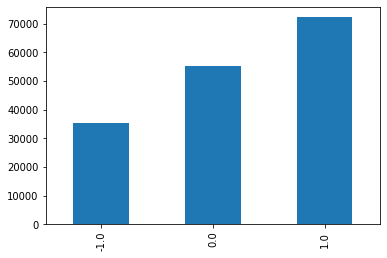

In [4]:
# Performing the data exploration part which is necessary for our project.
# Plotting the bar graph for our category column.
data['category'].value_counts().sort_index().plot.bar()

<AxesSubplot:ylabel='Frequency'>

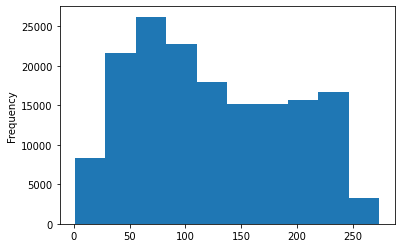

In [5]:
# Plotting the histogram graph for our text column.
data['text'].str.len().plot.hist()

In [6]:
# Printing the first hundred rows of text column of the dataset.
data['text'].head(100)

0     when modi promised “minimum government maximum...
1     talk all the nonsense and continue all the dra...
2     what did just say vote for modi  welcome bjp t...
3     asking his supporters prefix chowkidar their n...
4     answer who among these the most powerful world...
                            ...                        
95    country prospers when the women the country ar...
96                 sabbash mera vote for peppermit abvp
97    yogi adityanath hold 100 rallies seek votes fo...
98    from the very beginningmodi doing wada faramos...
99    modi politics hate modiji loves india modiji w...
Name: text, Length: 100, dtype: object

In [7]:
# Performing the preprocessing or data preprocessing task.
# Removing or replacing the given word from our text column.
data['text'] = data['text'].head(100).str.replace('@TheUnitedStatesOfAmerica', '')
data['text'].head(100)

0     when modi promised “minimum government maximum...
1     talk all the nonsense and continue all the dra...
2     what did just say vote for modi  welcome bjp t...
3     asking his supporters prefix chowkidar their n...
4     answer who among these the most powerful world...
                            ...                        
95    country prospers when the women the country ar...
96                 sabbash mera vote for peppermit abvp
97    yogi adityanath hold 100 rallies seek votes fo...
98    from the very beginningmodi doing wada faramos...
99    modi politics hate modiji loves india modiji w...
Name: text, Length: 100, dtype: object

In [8]:
# Doing tokenization i.e. splitting text present in text column of dataset into words.

# num_words = No of unique words
# This will be the maximum number of words from our resulting tokenized data vocabulary which are to be used further.

tokenizer = Tokenizer(num_words=5000, split=" ")
tokenizer.fit_on_texts(data['text'].head(100).values)

# Encode training data sentences into sequences.
# Converting our text sentences i.e. for example "My name is Navansh Sharma" to something like "6 18 4 14 12" where
# each of those numbers match up in the index to the corresponding words.

# Pad the training sequences.
# Using the length of the longest sequence we will use that to pad all other sequences with extra '0's at the end ('post')
# and we will also truncate any sequences longer than maximum length from the end ('post').

X = tokenizer.texts_to_sequences(data['text'].head(100).values)
# Padding our text vector so they all have the same length
X = pad_sequences(X)
X[:5]

array([[  0,   0,   0,   0,   0,   0,   0,  52,   1, 151, 279,  53, 280,
        281, 282,  28, 283,   2, 284,  54, 285,   2,  97,  29,  73,  55,
         33,  98, 152,  97,  56,   3,   8, 286,   3,  56, 153, 154,   3,
        287],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0, 155,  12,   2, 288,   3, 289,  12,   2, 290,  17,   5,   4,
          1],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,  18,  57,  19,  74,   5,   4,   1, 291,
         23, 292,   9,  75,   2, 293, 294,   4,   1, 156,   1,  56,  19,
        295],
       [  0,   0,   0,   0,   0,   0, 296,  22, 157, 297,  99,  76, 298,
          1,  57,  42, 299,  58,  59, 300,  18, 301,  18,   8,  58, 302,
        100,  18,  17, 303, 304, 305, 158, 101,  77, 306,   6, 307,  20,
        308],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 

In [9]:
# Performing the preprocessing or data preprocessing task.
# Doing normalization i.e. converting uppercase to lowercase characters
lower_case = data['text'].head(100).to_string(na_rep='').lower()
print("The dataset with lower case character is ")
data['text'].head(100)
print(lower_case)

# Doing noise removal i.e. removing punctuations and extra white spaces
cleaned_text = lower_case.translate(str.maketrans('', '', string.punctuation))
print("The dataset after removing punctuations is ")
print(cleaned_text)

# Doing tokenization i.e. splitting text into words
tokenized_words = cleaned_text.split()
print("The dataset after performing tokenization is ")
print(tokenized_words)

The dataset with lower case character is 
0     when modi promised “minimum government maximum...
1     talk all the nonsense and continue all the dra...
2     what did just say vote for modi  welcome bjp t...
3     asking his supporters prefix chowkidar their n...
4     answer who among these the most powerful world...
5              kiya tho refresh maarkefir comment karo 
6     surat women perform yagna seeks divine grace f...
7     this comes from cabinet which has scholars lik...
8     with upcoming election india saga going import...
9                            gandhi was gay does modi  
10    things like demonetisation gst goods and servi...
11    hope tuthukudi people would prefer honest well...
12                    calm waters wheres the modi wave 
13    one vote can make all the difference anil kapo...
14    one vote can make all the difference anil kapo...
15    vote such party and leadershipwho can take fas...
16                   vote modi who has not created jobs
17    

In [10]:
# Basically stop words are useless words to be ignored.
# Removing stop_words present in the text column of our dataset.
stop_words = ["i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself",
              "yourselves", "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself",
              "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these",
              "those", "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had", "having", "do",
              "does", "did", "doing", "a", "an", "the", "and", "but", "if", "or", "because", "as", "until", "while",
              "of", "at", "by", "for", "with", "about", "against", "between", "into", "through", "during", "before",
              "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again",
              "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", "both", "each",
              "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so", "than",
              "too", "very", "s", "t", "can", "will", "just", "don", "should", "now"]
# Removing stop words from the tokenized words list.
final_words = []
for word in tokenized_words:
    if word not in stop_words:
        final_words.append(word)

print(final_words)

['0', 'modi', 'promised', '“minimum', 'government', 'maximum', '1', 'talk', 'nonsense', 'continue', 'dra', '2', 'say', 'vote', 'modi', 'welcome', 'bjp', '3', 'asking', 'supporters', 'prefix', 'chowkidar', 'n', '4', 'answer', 'among', 'powerful', 'world', '5', 'kiya', 'tho', 'refresh', 'maarkefir', 'comment', 'karo', '6', 'surat', 'women', 'perform', 'yagna', 'seeks', 'divine', 'grace', 'f', '7', 'comes', 'cabinet', 'scholars', 'lik', '8', 'upcoming', 'election', 'india', 'saga', 'going', 'import', '9', 'gandhi', 'gay', 'modi', '10', 'things', 'like', 'demonetisation', 'gst', 'goods', 'servi', '11', 'hope', 'tuthukudi', 'people', 'would', 'prefer', 'honest', 'well', '12', 'calm', 'waters', 'wheres', 'modi', 'wave', '13', 'one', 'vote', 'make', 'difference', 'anil', 'kapo', '14', 'one', 'vote', 'make', 'difference', 'anil', 'kapo', '15', 'vote', 'party', 'leadershipwho', 'take', 'fas', '16', 'vote', 'modi', 'created', 'jobs', '17', 'vote', 'ensure', 'govt', 'need', 'deserve', '18', 'dont

In [12]:
# Apply Natural Language Processing (NLP) Emotion Algorithm. In the NLP Emotion Algorithm, we will:-
# 1) Check if the word present in the final word list is also present in emotion.txt.
#  - We can open the emotion file.
#  - We will iterate through each line and clear it.
#  - We will extract the word and emotion using split.
# 2) If the word is present then we will add the emotion to emotion_list.
# 3) We will finally count each emotion present in the emotion list.

emotion_list = []
with open('emotions.txt', 'r') as file:
    for line in file:
#        print(line)
        clear_line = line.replace("\n", '').replace(",", '').replace("'", '').strip()
#        print(clear_line)
        word, emotion = clear_line.split(':')
        print("Word :" + word + " " + "Emotion :" + emotion)

        if word in final_words:
            emotion_list.append(emotion)

print(emotion_list)
w = Counter(emotion_list)
print(w)

Word :victimized Emotion : cheated
Word :accused Emotion : cheated
Word :acquitted Emotion : singled out
Word :adorable Emotion : loved
Word :adored Emotion : loved
Word :affected Emotion : attracted
Word :afflicted Emotion : sad
Word :aghast Emotion : fearful
Word :agog Emotion : attracted
Word :agonized Emotion : sad
Word :alarmed Emotion : fearful
Word :amused Emotion : happy
Word :angry Emotion : angry
Word :anguished Emotion : sad
Word :animated Emotion : happy
Word :annoyed Emotion : angry
Word :anxious Emotion : attracted
Word :apathetic Emotion : bored
Word :appalled Emotion : angry
Word :appeased Emotion : singled out
Word :appreciated Emotion : esteemed
Word :apprehensive Emotion : fearful
Word :approved of Emotion : loved
Word :ardent Emotion : lustful
Word :aroused Emotion : lustful
Word :attached Emotion : attached
Word :attracted Emotion : attracted
Word :autonomous Emotion : independent
Word :awed Emotion : fearful
Word :awkward Emotion : embarrassed
Word :beaten down Em

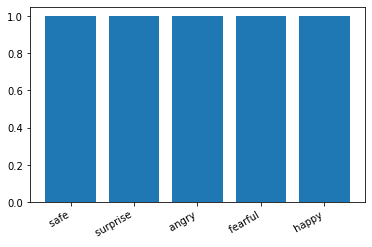

In [13]:
# Plotting the emotions on the bar graph.
fig, ax1 = plt.subplots()
ax1.bar(w.keys(), w.values())
fig.autofmt_xdate()
plt.savefig('graph.png')
plt.show()

In [14]:
# Creating the LSTM (Long Short - Term Memory) model for our project.

# The Embedding layer is used to create word vectors for incoming words. It sits between the input and the LSTM layer, i.e.
# the output of the Embedding layer is the input to the LSTM layer.
#input_dim : Size of the vocabulary--output_dim : Length of the vector for each word--input_length:Maximum Length of a sequence.
# The data on the input connection to each LSTM block will be excluded.
# Fraction of the input units to drop, helps prevent overfitting.
# 256=No. of units, return a sequence = use the last output, recurrent_dropout = Fraction of the units to drop for the linear
# transformation. Layer where each neuron receives input from all neurons in the previous layer.
# 3 = No.of units, activation = The softmax function is used as the activation function in the output layer of neural network
# models that predict a multinomial probability distribution.

model = Sequential()
model.add(Embedding(5000, 256, input_length=X.shape[1]))
model.add(Dropout(0.3))
model.add(LSTM(256, return_sequences=True, dropout=0.3, recurrent_dropout=0.2))
model.add(LSTM(256, dropout=0.3, recurrent_dropout=0.2))
model.add(Dense(3, activation='softmax'))

In [15]:
# Using summary() function we can get to know the number of parameters present in our LSTM model.

# Loss = find deviation in the learning process, optimizer = Optimization is an important process which optimize the input
# weights by comparing the prediction and the loss function, Metrics = Metrics is used to evaluate the performance of our model.

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 40, 256)           1280000   
                                                                 
 dropout (Dropout)           (None, 40, 256)           0         
                                                                 
 lstm (LSTM)                 (None, 40, 256)           525312    
                                                                 
 lstm_1 (LSTM)               (None, 256)               525312    
                                                                 
 dense (Dense)               (None, 3)                 771       
                                                                 
Total params: 2,331,395
Trainable params: 2,331,395
Non-trainable params: 0
_________________________________________________________________


In [16]:
# Printing the first five lows for our category column in which [1 0 0] represent -1.0 value which represent negative 
# sentiment or emotion, [0 1 0] represent 0.0 value which represent neutral sentiment or emotion and [0 0 1] represent 1.0
# value which represent positive sentiment or emotion.
y = pd.get_dummies(data['category'].head(100)).values
[print(data['category'].head(100)[i], y[i]) for i in range(0,5)]

-1.0 [1 0 0]
0.0 [0 1 0]
1.0 [0 0 1]
1.0 [0 0 1]
1.0 [0 0 1]


[None, None, None, None, None]

In [17]:
# Assigning testing data percentage as 20% and training data percentage as 80%. Here X_train represents text column training
# data part, y_train represents category column training data part, X_test represents text column testing data part, and 
# y_test represents category column testing data part.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [18]:
# Training the LSTM (Long Short - Term Memory) model.
#batch_size = 32
#epochs = 8

batch_size = 32
#epochs = 16
epochs = 100

model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=2)

Epoch 1/100
3/3 - 11s - loss: 1.0934 - accuracy: 0.3000 - 11s/epoch - 4s/step
Epoch 2/100
3/3 - 2s - loss: 1.0722 - accuracy: 0.4500 - 2s/epoch - 699ms/step
Epoch 3/100
3/3 - 2s - loss: 1.0225 - accuracy: 0.5125 - 2s/epoch - 641ms/step
Epoch 4/100
3/3 - 2s - loss: 0.9834 - accuracy: 0.5250 - 2s/epoch - 629ms/step
Epoch 5/100
3/3 - 2s - loss: 0.9015 - accuracy: 0.6375 - 2s/epoch - 646ms/step
Epoch 6/100
3/3 - 2s - loss: 0.7960 - accuracy: 0.6625 - 2s/epoch - 636ms/step
Epoch 7/100
3/3 - 2s - loss: 0.6683 - accuracy: 0.7500 - 2s/epoch - 651ms/step
Epoch 8/100
3/3 - 2s - loss: 0.4240 - accuracy: 0.8875 - 2s/epoch - 638ms/step
Epoch 9/100
3/3 - 2s - loss: 0.2382 - accuracy: 0.9500 - 2s/epoch - 658ms/step
Epoch 10/100
3/3 - 2s - loss: 0.1004 - accuracy: 0.9875 - 2s/epoch - 647ms/step
Epoch 11/100
3/3 - 2s - loss: 0.4010 - accuracy: 0.8125 - 2s/epoch - 667ms/step
Epoch 12/100
3/3 - 2s - loss: 0.4295 - accuracy: 0.7875 - 2s/epoch - 660ms/step
Epoch 13/100
3/3 - 2s - loss: 0.1642 - accuracy: 0

In [19]:
# Making and saving file as sentiment_analysis.h5.
#model.save('sentiment_analysis.h5')

In [20]:
# Check the loss for training the model.
trainScore = model.evaluate(X_train, y_train, verbose=0)
print(trainScore)

[9.5101808256004e-05, 1.0]


Epoch 1/100
3/3 - 2s - loss: 1.0918e-04 - accuracy: 1.0000 - 2s/epoch - 647ms/step
Epoch 2/100
3/3 - 2s - loss: 1.0442e-04 - accuracy: 1.0000 - 2s/epoch - 633ms/step
Epoch 3/100
3/3 - 2s - loss: 1.2565e-04 - accuracy: 1.0000 - 2s/epoch - 637ms/step
Epoch 4/100
3/3 - 2s - loss: 9.4827e-05 - accuracy: 1.0000 - 2s/epoch - 638ms/step
Epoch 5/100
3/3 - 2s - loss: 1.1589e-04 - accuracy: 1.0000 - 2s/epoch - 640ms/step
Epoch 6/100
3/3 - 2s - loss: 9.8211e-05 - accuracy: 1.0000 - 2s/epoch - 635ms/step
Epoch 7/100
3/3 - 2s - loss: 9.6617e-05 - accuracy: 1.0000 - 2s/epoch - 648ms/step
Epoch 8/100
3/3 - 2s - loss: 8.8463e-05 - accuracy: 1.0000 - 2s/epoch - 668ms/step
Epoch 9/100
3/3 - 2s - loss: 1.0528e-04 - accuracy: 1.0000 - 2s/epoch - 628ms/step
Epoch 10/100
3/3 - 2s - loss: 1.3409e-04 - accuracy: 1.0000 - 2s/epoch - 659ms/step
Epoch 11/100
3/3 - 2s - loss: 1.1967e-04 - accuracy: 1.0000 - 2s/epoch - 657ms/step
Epoch 12/100
3/3 - 2s - loss: 1.0174e-04 - accuracy: 1.0000 - 2s/epoch - 638ms/step
E

Epoch 99/100
3/3 - 2s - loss: 4.0904e-05 - accuracy: 1.0000 - 2s/epoch - 656ms/step
Epoch 100/100
3/3 - 2s - loss: 3.9106e-05 - accuracy: 1.0000 - 2s/epoch - 635ms/step


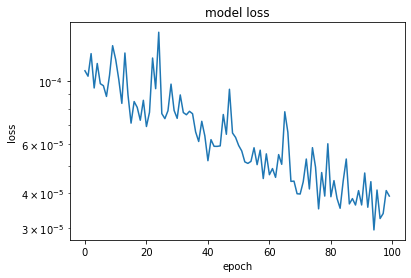

In [21]:
# Summarize the history for loss. Plotting the performance graph for our project.
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=2)
plt.plot(history.history['loss'])
plt.yscale("log")
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [22]:
# Testing the LSTM (Long Short - Term Memory) model.
predictions = model.predict(X_test)

[print(data['text'].head(100)[i], predictions[i], y_test[i]) for i in range(0, 20)]

when modi promised “minimum government maximum governance” expected him begin the difficult job reforming the state why does take years get justice state should and not business and should exit psus and temples [0.02389838 0.03961894 0.93648267] [0 1 0]
talk all the nonsense and continue all the drama will vote for modi  [0.0017069  0.7995525  0.19874066] [0 1 0]
what did just say vote for modi  welcome bjp told you rahul the main campaigner for modi think modi should just relax [0.20778188 0.54578495 0.24643321] [0 0 1]
asking his supporters prefix chowkidar their names modi did great service now there confusion what read what not now crustal clear what will crass filthy nonsensical see how most abuses are coming from chowkidars [9.9819656e-05 1.1817466e-03 9.9871850e-01] [1 0 0]
answer who among these the most powerful world leader today trump putin modi may  [2.0367293e-04 9.5811641e-01 4.1679915e-02] [0 1 0]
kiya tho refresh maarkefir comment karo  [0.02058499 0.24643676 0.7329783 

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [23]:
# Check the loss for testing the model.
testScore = model.evaluate(X_test, y_test, verbose=0)
print(testScore)

[1.9069792032241821, 0.5]


In [24]:
# f1 score= 2*(ps*rs)/ps+rs
# ps=TP/(TP+FP)
# rs= TP/(TP+FN)
# y_pred=predictions
y_test_arg=np.argmax(y_test,axis=1)
Y_pred = np.argmax(model.predict(X_test),axis=1)
print( precision_score(y_test_arg,Y_pred,average='macro'))

0.5545454545454546


In [25]:
print(recall_score(y_test_arg,Y_pred,average='macro'))

0.4904761904761905


In [26]:
print(f1_score(y_test_arg,Y_pred,average='macro'))

0.5014245014245015


In [27]:
# Doing or measuring or predicting the actual value for positive, neutral and negative sentiment for testing dataset or model.
pos_count, neu_count, neg_count = 0, 0, 0
real_pos, real_neu, real_neg = 0, 0, 0
for i, prediction in enumerate(predictions):
    if np.argmax(prediction)==2:
        pos_count += 1
    elif np.argmax(prediction)==1:
        neu_count += 1
    else:
        neg_count += 1
        
    if np.argmax(y_test[i])==2:
        real_pos += 1
    elif np.argmax(y_test[i])==1:
        real_neu +=1
    else:
        real_neg +=1
        
print('Positive predictions:', pos_count)
print('Neutral predictions:', neu_count)
print('Negative predictions:', neg_count)
print('Real positive:', real_pos)
print('Real neutral:', real_neu)
print('Real negative:', real_neg)

Positive predictions: 11
Neutral predictions: 5
Negative predictions: 4
Real positive: 7
Real neutral: 8
Real negative: 5


In [29]:
#pip install nltk

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\Hartej Singh\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.
